In [7]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import joblib


In [ ]:
#Loading Dataset
df=pd.read_csv('heart.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Clean Data

In [8]:
#Loading Dataset
df=pd.read_csv('heart.csv')

#check and drop missing values
df.isnull().sum()
#drop duplicates
df.dropna(inplace=True)
df.shape

(1025, 14)

In [9]:

# Fill numeric columns with median
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill categorical (non-numeric) columns with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check if any missing values are left
print("Missing values after cleaning:\n", df.isnull().sum())

# Save the cleaned dataset
df.to_csv("heart_cleaned.csv", index=False)

# Download cleaned file
files.download("heart_cleaned.csv")
print("Cleaned file saved and ready for use.")

Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-9-3875407292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned file saved and ready for use.


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in label_cols:
    if col in df.columns:  # only encode if column exists
        df[col] = le.fit_transform(df[col])

df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Visualization of DataSet


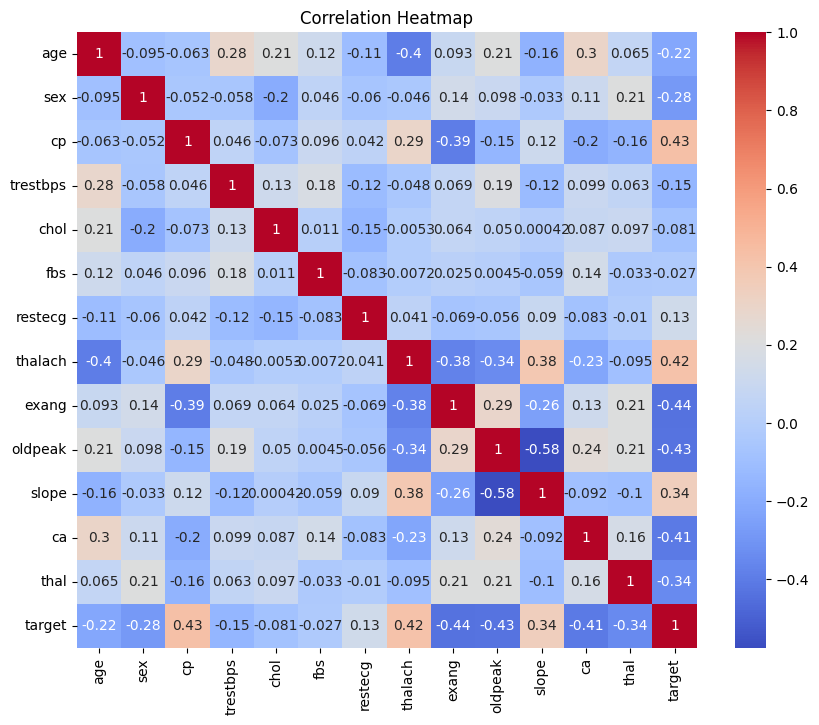

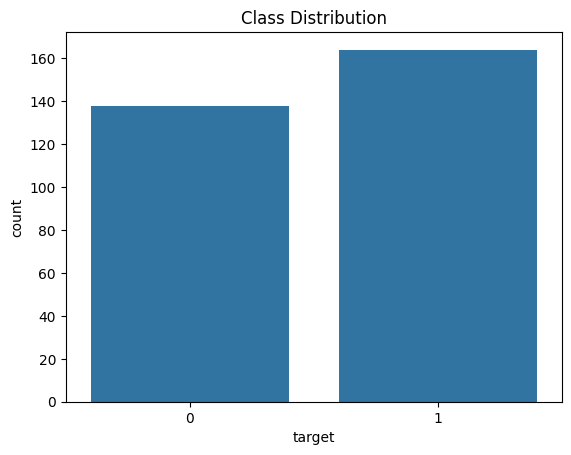

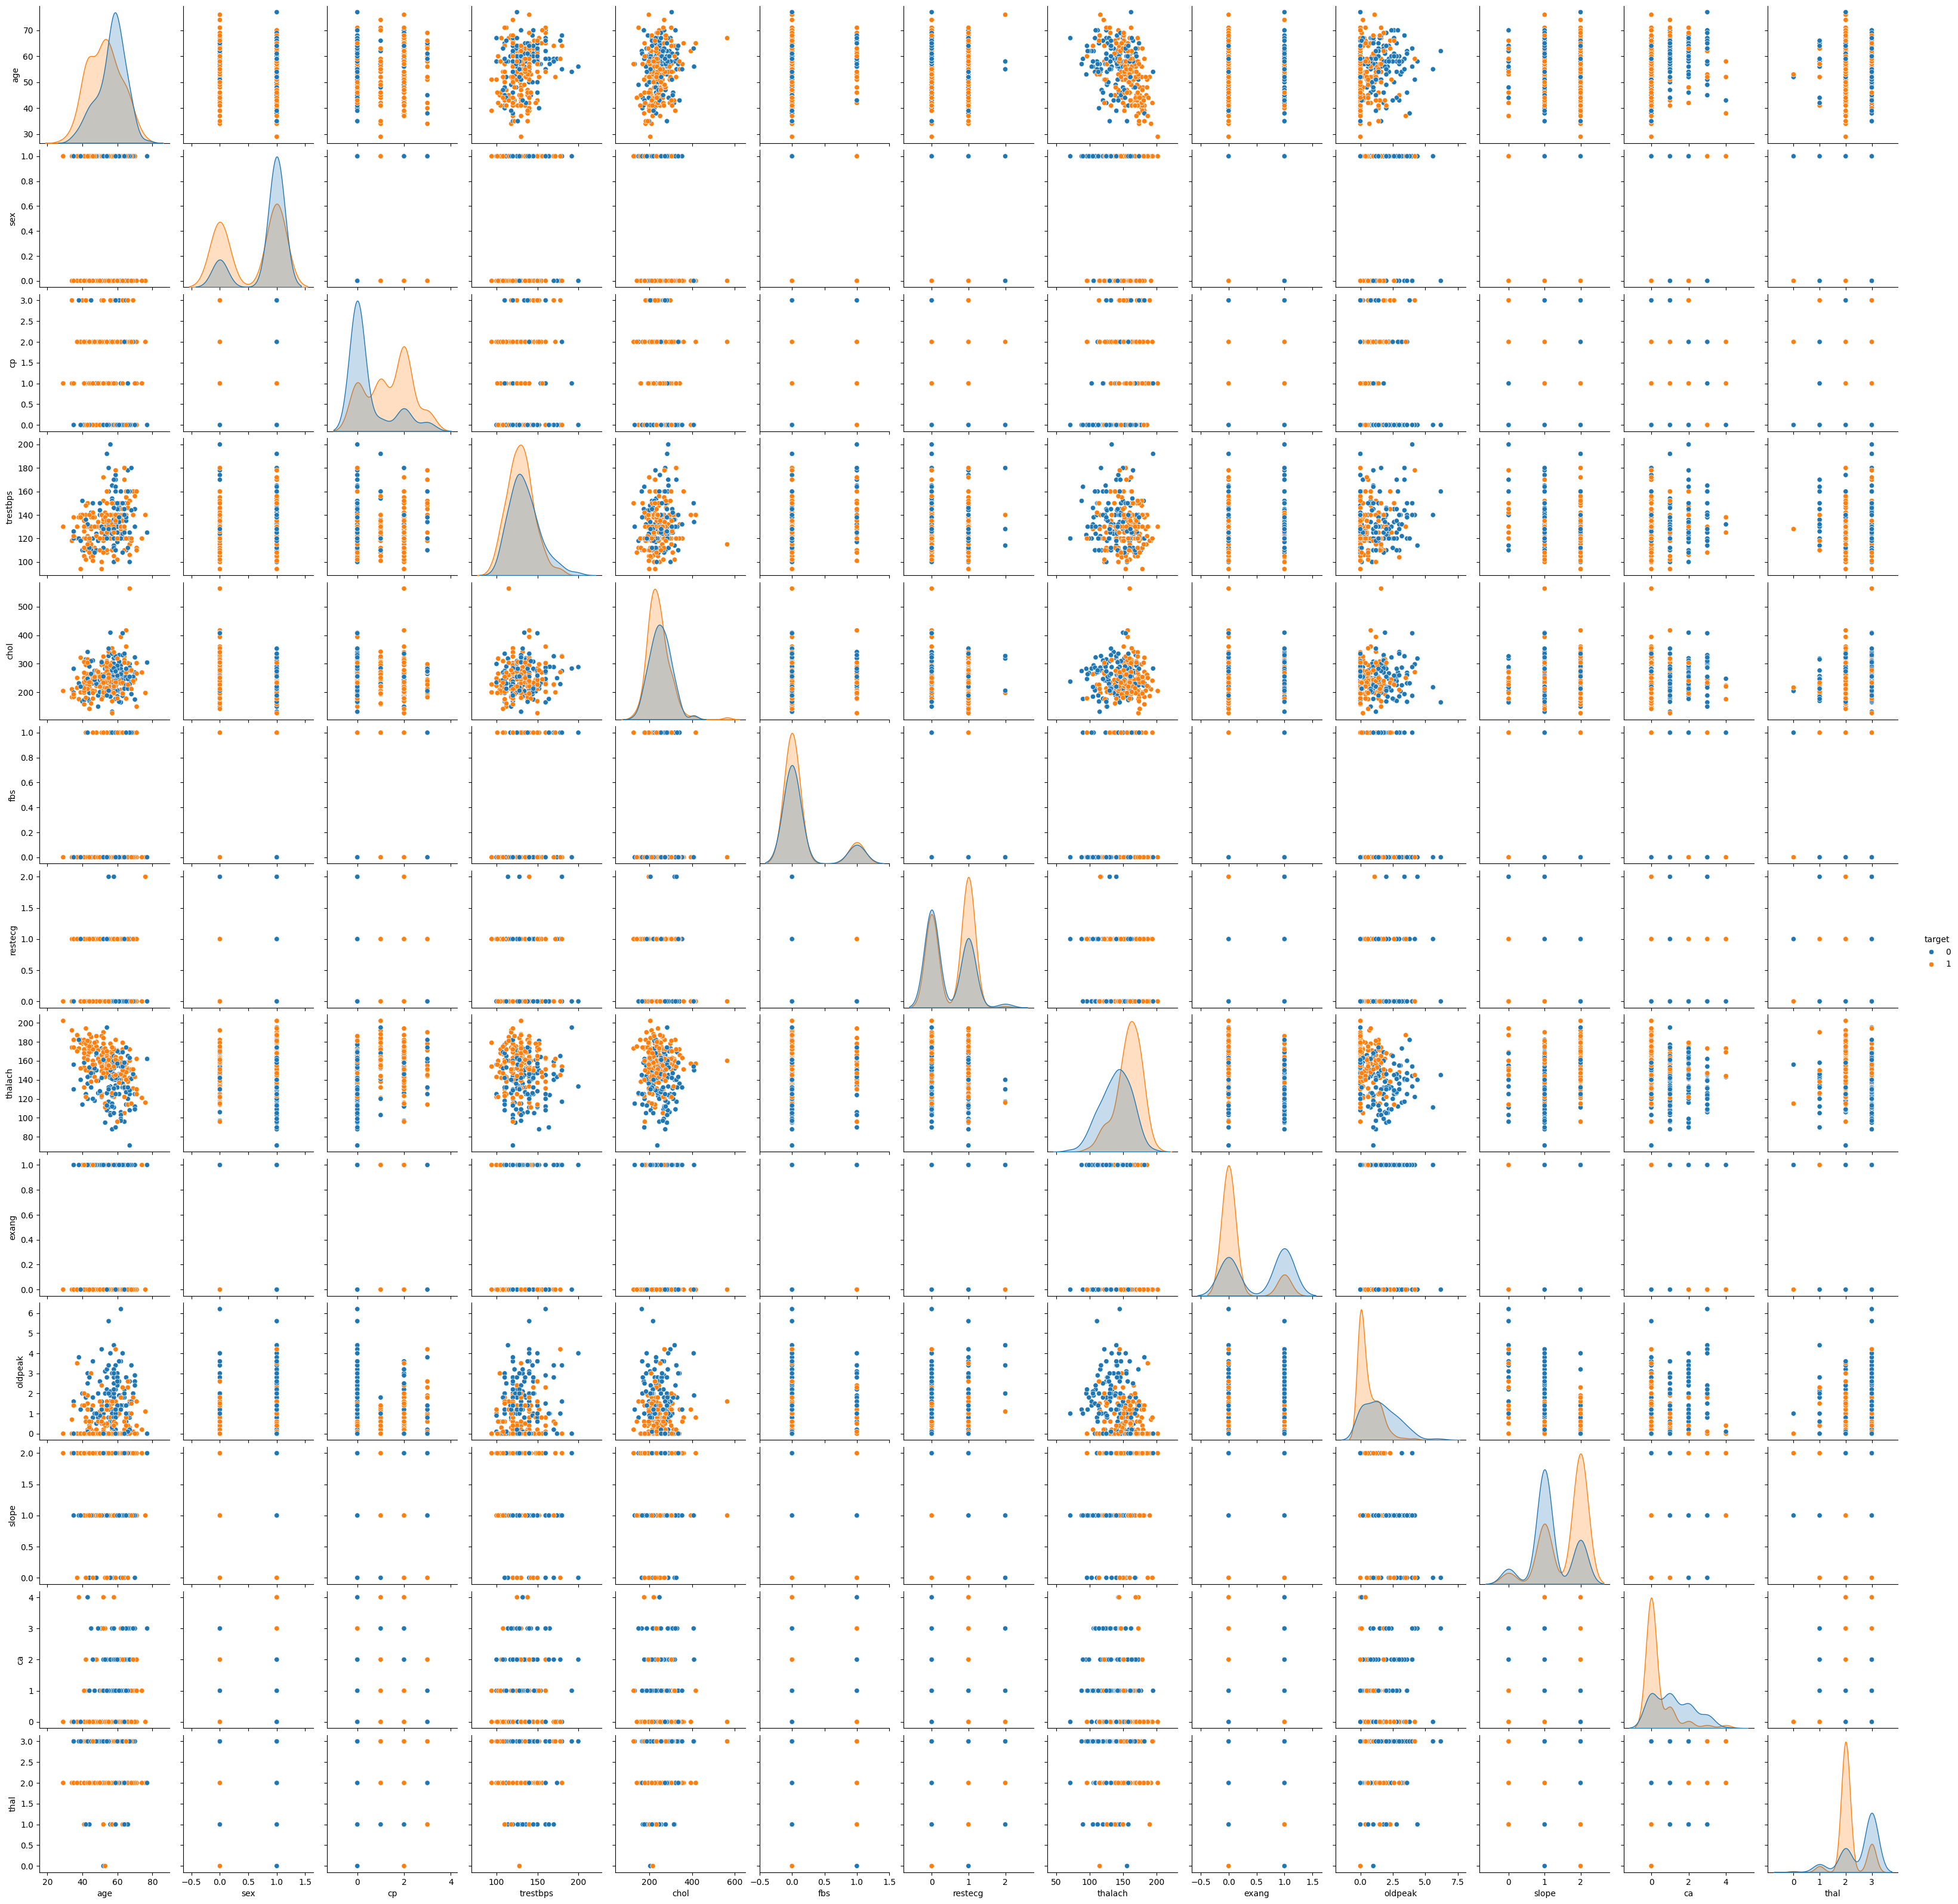

In [15]:
# Correlation HeatMap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Class Distribution
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

# Pairplot
sns.pairplot(df, hue='target')
plt.show()

Split Features and Target

In [16]:
x=df.drop('target',axis=1)
y=df['target']
#Binary Target
y= y.apply(lambda x: 1 if x > 0 else 0)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Save test sets for later evaluation
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Train Logistic Regression

In [26]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_acc)
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))



Logistic Regression Accuracy: 0.7704918032786885
[[21 11]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



Save Logistitic regression Model

In [27]:
joblib.dump(log_model, "logistic_model.pkl")

['logistic_model.pkl']

Train SVM


In [28]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("\nSVM Accuracy:", svm_acc)
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7540983606557377
[[23  9]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.72      0.79      0.75        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



Save SVM Model


In [29]:
joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

Save Scalara and Test Data

In [30]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

print("\nModels and scaler saved successfully!")


Models and scaler saved successfully!
